# Методы построения моделей машинного обучения.
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

# Вариант №3
# Гурова Мария Дмитриевна 

ИУ5-65Б

Метод №1: 
Метод опорных векторов

Метод №2: Градиентный бустинг 

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import xgboost as xgb
# Данные
df = "/content/HousingData.csv.xls"
raw_df = pd.read_csv(df)



In [3]:
# Первые 5 строк датасета
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
# Удалим дубликаты записей, если они присутствуют
raw_df = raw_df.drop_duplicates()
raw_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
# Проверим наличие пустых значений
raw_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
# Уберем нулевые значения 
raw_df = raw_df.dropna(axis=0, how='any')
raw_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
data = raw_df.iloc[:, :-1]
target = raw_df.iloc[:, -1]
X = data
y = target

In [8]:
# Разделим выборку 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
X_train.shape

(315, 13)

In [10]:
X_test.shape

(79, 13)

In [11]:
svm = SVR(kernel='linear')
svm.fit(X_train, y_train.values.ravel())


SVR(kernel='linear')

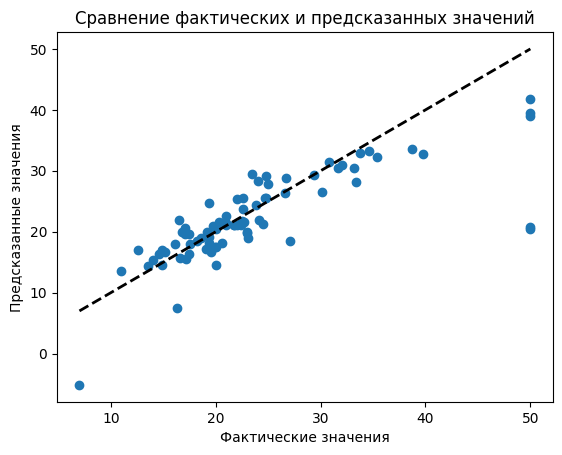

Mean Squared Error (MSE): 35.980529532532046
R-squared: 0.5734196271522025


In [13]:

y_pred = svm.predict(X_test)

# Создание графика фактических значений и предсказанных значений
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение фактических и предсказанных значений")
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


In [16]:

# Инициализация модели градиентного бустинга
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Обучение модели градиентного бустинга
xgboost.fit(X_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = xgboost.predict(X_test)


In [17]:
# Оценка модели с помощью метрик
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)


Mean Squared Error (MSE): 24.855039104492405
R-squared: 0.7053219620140811


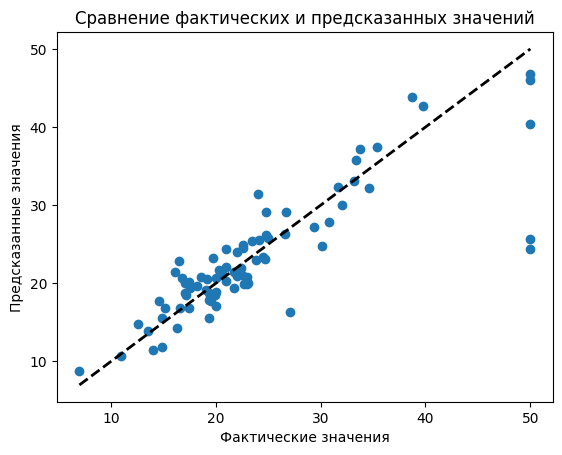

In [18]:
# Создание графика фактических значений и предсказанных значений
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Сравнение фактических и предсказанных значений")
plt.show()

Для задачи регрессии, мы используем две метрики - среднеквадратичную ошибку (MSE) и коэффициент детерминации (R-squared).

MSE измеряет среднеквадратичную разницу между фактическими и предсказанными значениями. Она предоставляет информацию о точности модели, где меньшее значение MSE указывает на лучшую модель. MSE полезна, когда мы хотим получить численную оценку ошибки модели.

R-squared измеряет долю объясненной дисперсии в данных. Он предоставляет информацию о том, насколько хорошо модель объясняет вариацию целевой переменной. Значение находится в диапазоне от 0 до 1, чем ближе к 1, тем лучше модель.



Вывод: 

Модель градиентного бустинга лучше, так как MSE у нее меньше, а R2 ближе к 1. 